In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [ ]:
folders = ['1.InerciaGeneralizada-DisparoGenerador', '3.InerciaLocalizada-DisparoGenerador']
data = pd.DataFrame()
for folder in folders:
    for file in os.listdir(f'data/raw/{folder}'):
        print(file)
        df = pd.read_excel(f'data/raw/{folder}/{file}')
        
        df = df.set_index('Time (s)')
        
        if 'DisparoGenerador' in folder:
            df['target'] = df['Fmin (Hz)'].min()
        else:
            df['target'] = df['Fmax (Hz)'].max()
        #df['target_fcoi'] = df['Fcoi (Hz)'].min()
        
        regexPattern = r"(\d+)"
        expression = file
        metadata = re.findall(regexPattern,expression)

        df['scenario'] = f'{metadata[0]}'
        df['case'] = f'{metadata[1]}'
        
        if len(metadata)>3:
            df['subcase'] = f'{metadata[2]}'
            df['result'] = f'{metadata[3]}'
        else:
            df['result'] = f'{metadata[2]}'
            
        if len(metadata)==3:
            df['code'] = f'{metadata[0]}_{metadata[1]}_{metadata[2]}'
        else:
            df['code'] = f'{metadata[0]}_{metadata[1]}_{metadata[2]}_{metadata[3]}'
        shortened_data = df.loc[(df.index<3) & (df.index>1)]

        data = pd.concat((data, shortened_data))

In [ ]:
data.to_csv('data/processed/DisparoGenerador.csv')

In [30]:
data = pd.read_csv('data/raw/DisparoGenerador.csv')

In [8]:
data.describe()

,Time (s),Fmin (Hz),Fmax (Hz),Fcoi (Hz),AngB1 (degrees),AngB1_unwrapped (degrees),AngB2 (degrees),AngB2_unwrapped (degrees),AngB3 (degrees),AngB3_unwrapped (degrees),target,scenario,case,result,subcase
count,304128.000000,304128.000000,304128.000000,304128.000000,304128.000000,304128.000000,304128.000000,304128.000000,304128.000000,304128.000000,304128.000000,304128.000000,304128.000000,304128.000000,228096.000000
mean,1.999566,58.760240,58.757065,58.757634,-15.390612,-5.166928,-14.527179,-1.481376,-15.391488,-2.861373,56.663890,1.750000,2.000000,5.000000,2.000000
std,0.577351,0.879098,0.875106,0.874982,93.593455,3.730588,93.754344,5.576323,93.880206,2.555699,1.012629,0.433013,0.816498,3.162283,0.816498
min,1.000000,56.539294,56.539294,56.540436,-179.997565,-15.273947,-179.999307,-15.903013,-179.999109,-8.679011,55.534993,1.000000,1.000000,0.000000,1.000000
25%,1.499783,58.076199,58.087764,58.086591,-83.357367,-7.502804,-82.474367,-6.182641,-82.751931,-4.914205,55.621652,1.750000,1.000000,2.000000,1.000000
50%,1.999566,58.999081,58.991452,58.996979,-22.618377,-3.937501,-21.678689,-0.439177,-24.128324,-2.662500,56.377798,2.000000,2.000000,5.000000,2.000000
75%,2.499349,59.464203,59.474418,59.481998,47.755824,-2.228475,47.991262,3.575382,48.845093,-0.937041,58.018466,2.000000,3.000000,8.000000,3.000000
max,2.999132,60.006656,60.006656,59.999205,179.996304,0.418359,179.999265,7.009071,179.999887,3.779157,58.034713,2.000000,3.000000,10.000000,3.000000


In [8]:
data.groupby(['scenario', 'case'])[['target_fmin', 'target_fcoi']].mean()

target_fmin  target_fcoi
scenario case                          
1        1       56.325662    56.327307
         2       55.579301    55.579400
         3       58.015936    58.016764
2        1       56.378853    56.380249
         2       55.607705    55.607783
         3       58.028701    58.029353

<AxesSubplot:xlabel='Time (s)', ylabel='AngB3_unwrapped (degrees)'>

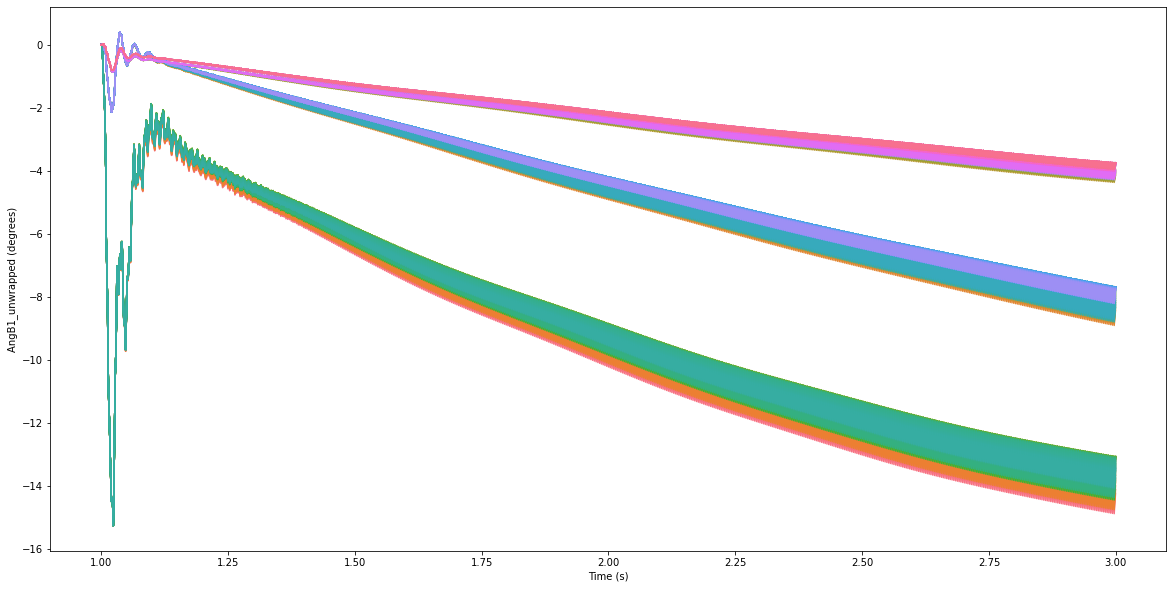

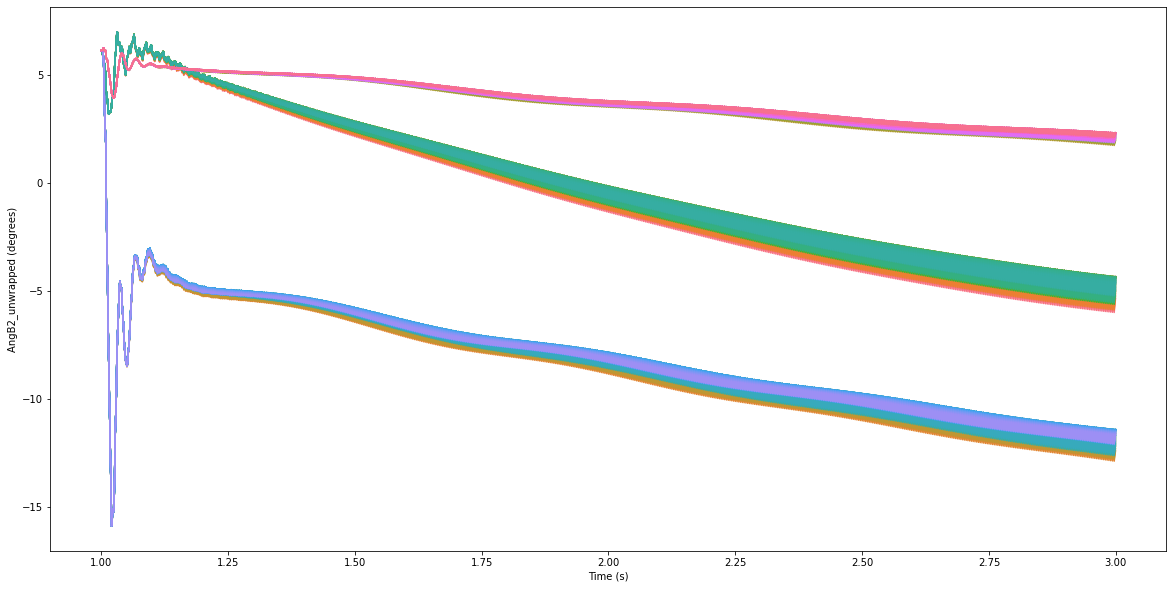

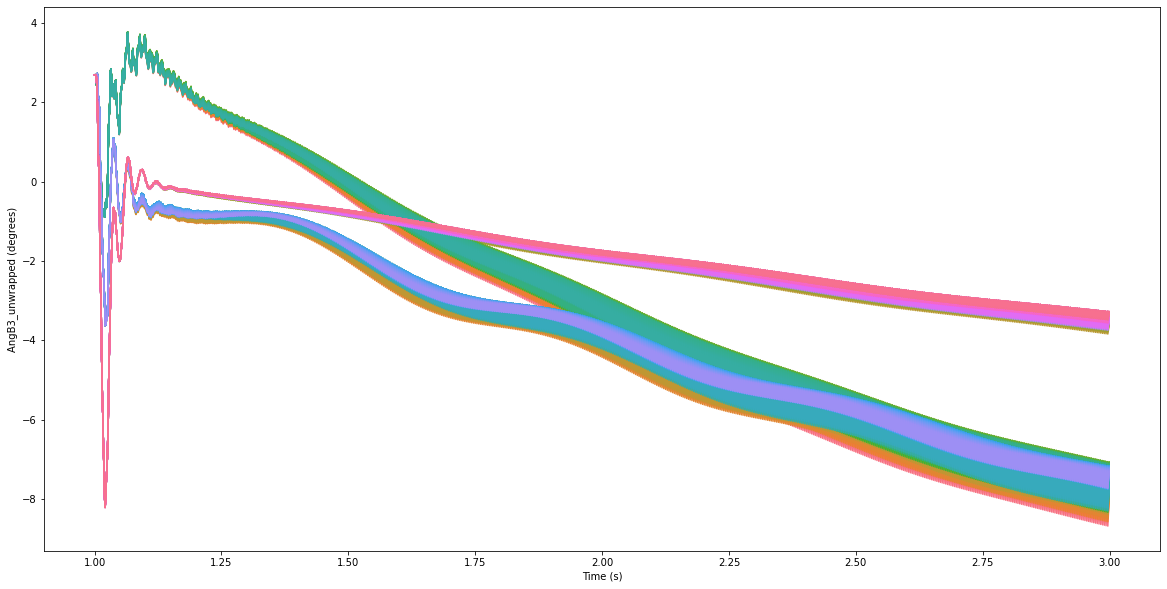

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(
    data=data[(data['Time (s)']>=1)&(data['Time (s)']<=3)].reset_index(),
    x="Time (s)", y="AngB1_unwrapped (degrees)", hue="code", legend=False
)

plt.figure(figsize=(20,10))
sns.lineplot(
    data=data[(data['Time (s)']>=1)&(data['Time (s)']<=3)].reset_index(),
    x="Time (s)", y="AngB2_unwrapped (degrees)", hue="code", legend=False
)

plt.figure(figsize=(20,10))
sns.lineplot(
    data=data[(data['Time (s)']>=1)&(data['Time (s)']<=3)].reset_index(),
    x="Time (s)", y="AngB3_unwrapped (degrees)", hue="code", legend=False
)

<AxesSubplot:xlabel='Time (s)', ylabel='AngB3_unwrapped (degrees)'>

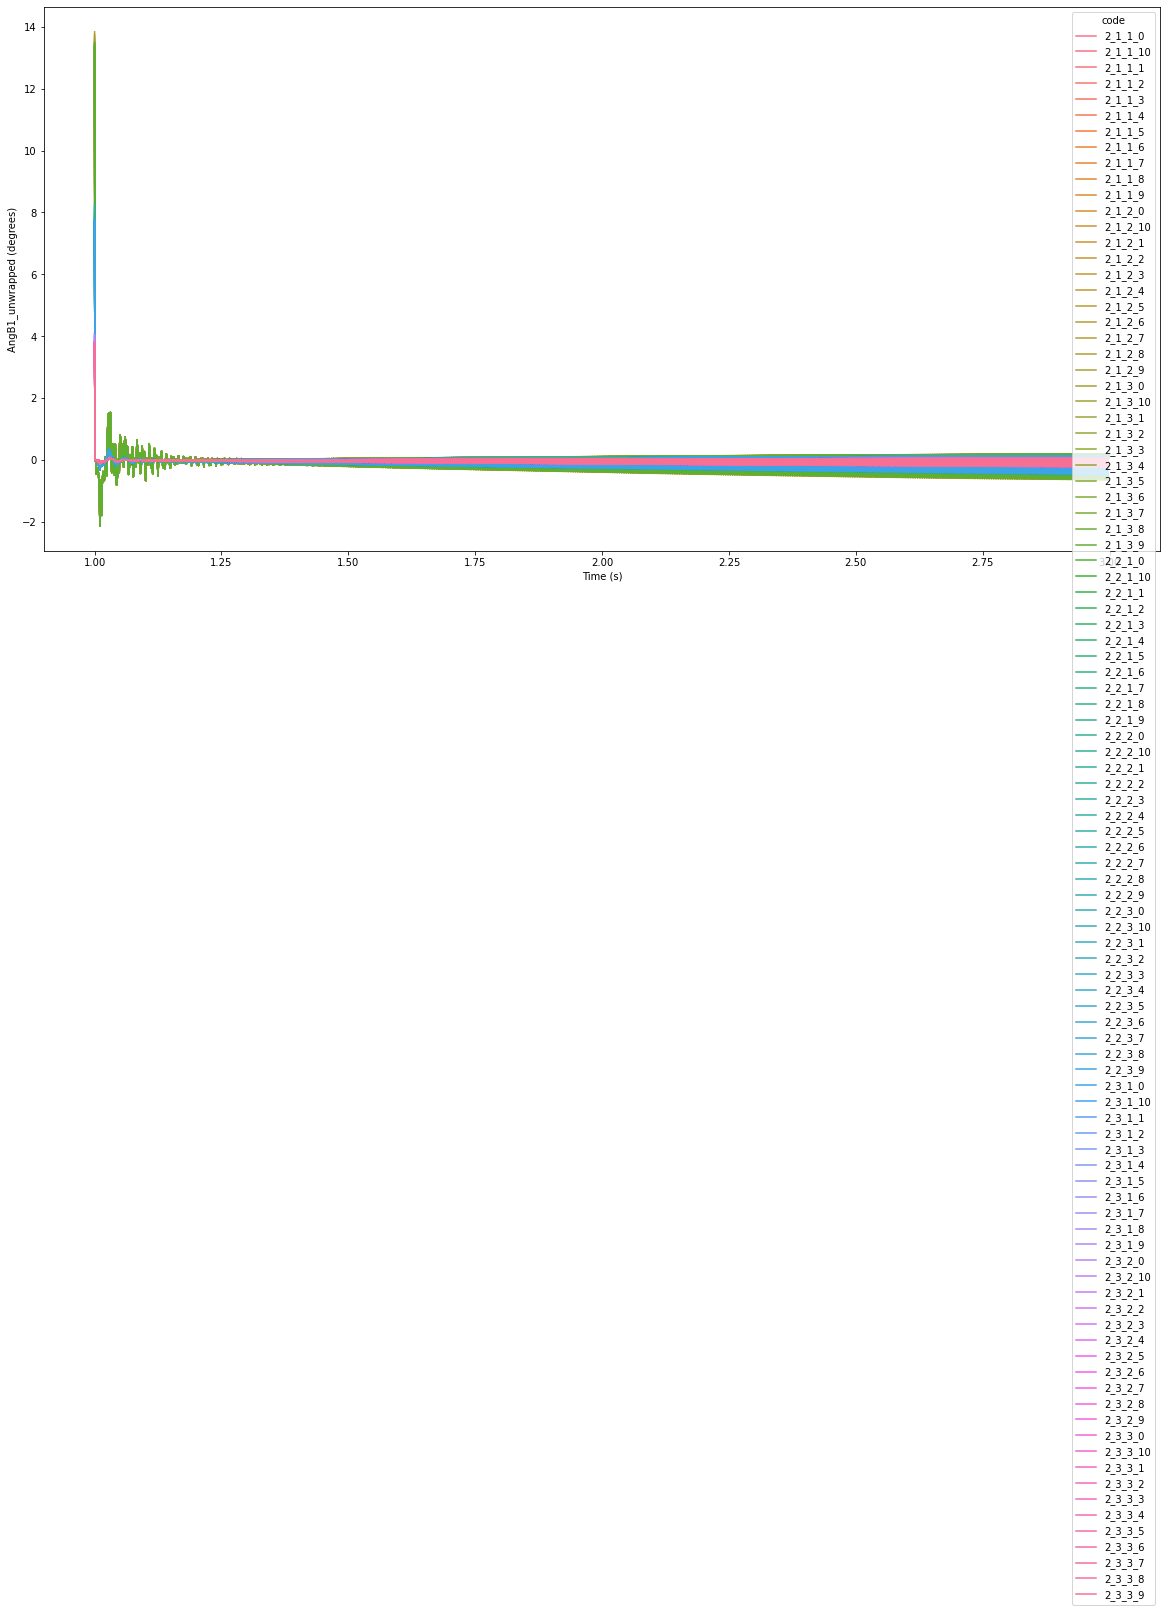

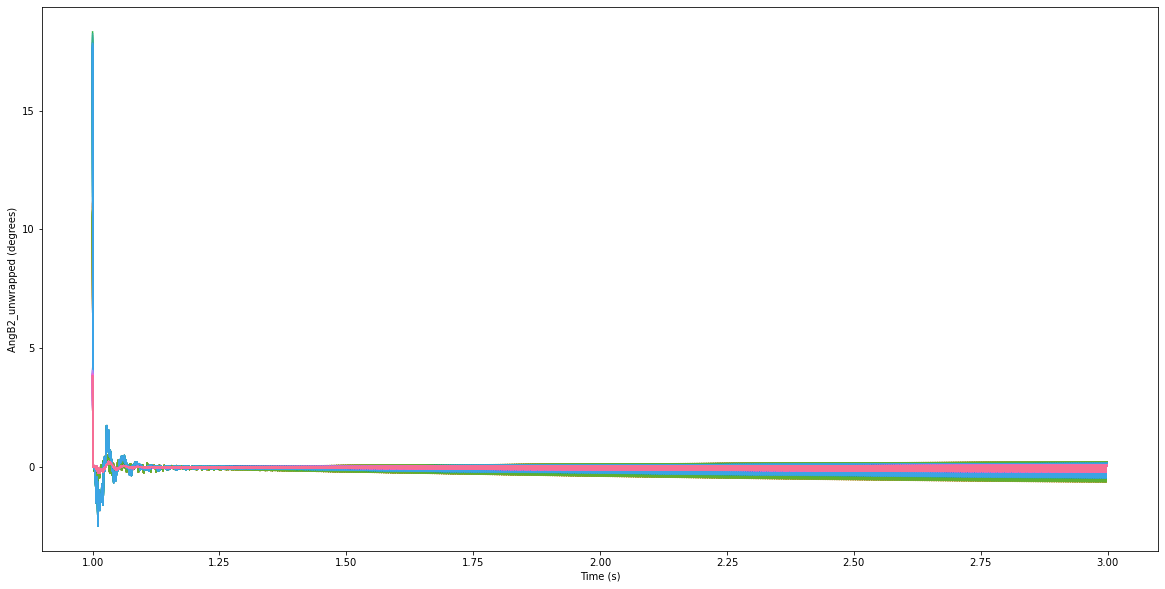

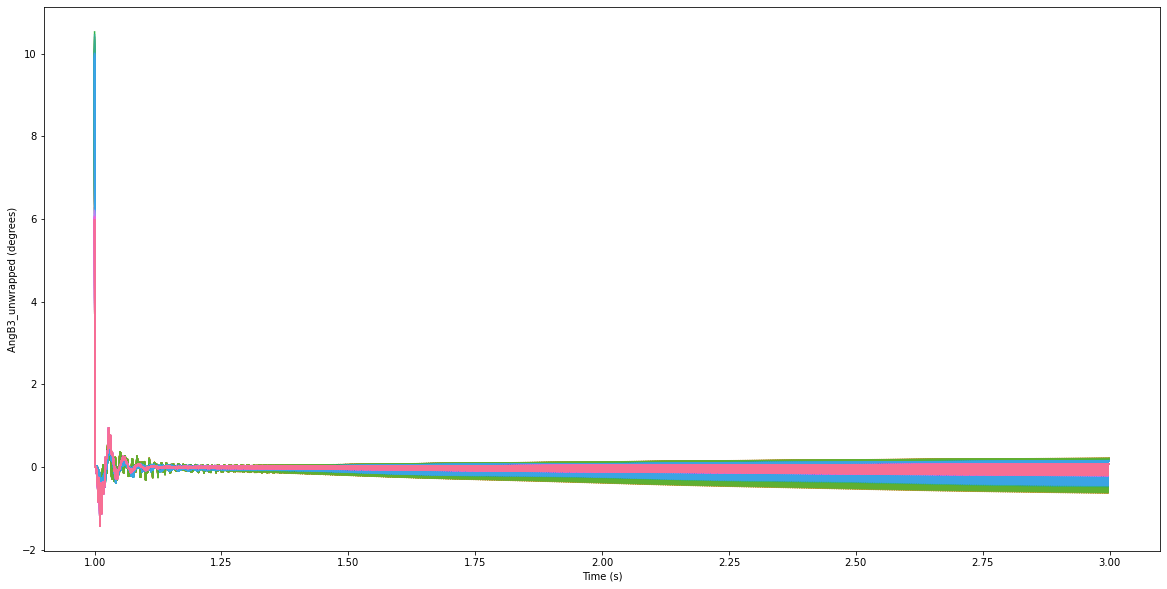

In [31]:
data.loc[:, ['AngB1_unwrapped (degrees)', 'AngB2_unwrapped (degrees)', 'AngB3_unwrapped (degrees)']] = (data[['AngB1_unwrapped (degrees)', 'AngB2_unwrapped (degrees)', 'AngB3_unwrapped (degrees)']] - data[['AngB1_unwrapped (degrees)', 'AngB2_unwrapped (degrees)', 'AngB3_unwrapped (degrees)']].shift(1))
data = data.dropna().reset_index()

plt.figure(figsize=(20,10))
sns.lineplot(
    data=data[(data['Time (s)']>=1)&(data['Time (s)']<=3)].reset_index(),
    x="Time (s)", y="AngB1_unwrapped (degrees)", hue="code", legend=False
)

plt.figure(figsize=(20,10))
sns.lineplot(
    data=data[(data['Time (s)']>=1)&(data['Time (s)']<=3)].reset_index(),
    x="Time (s)", y="AngB2_unwrapped (degrees)", hue="code", legend=False
)

plt.figure(figsize=(20,10))
sns.lineplot(
    data=data[(data['Time (s)']>=1)&(data['Time (s)']<=3)].reset_index(),
    x="Time (s)", y="AngB3_unwrapped (degrees)", hue="code", legend=False
)

In [29]:
data

,Time (s),Fmin (Hz),Fmax (Hz),Fcoi (Hz),AngB1 (degrees),AngB1_unwrapped (degrees),AngB2 (degrees),AngB2_unwrapped (degrees),AngB3 (degrees),AngB3_unwrapped (degrees),target,scenario,case,result,code
0,0.000868,60.000000,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.294286,1,1,7,1_1_7
1,0.001736,60.000000,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.294286,1,1,7,1_1_7
2,0.002604,60.000000,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.294286,1,1,7,1_1_7
3,0.003472,60.000000,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.294286,1,1,7,1_1_7
4,0.004340,60.000000,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.294286,1,1,7,1_1_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,19.996528,57.267957,57.267957,57.267961,33.052657,-0.512254,47.377762,-0.512254,43.072060,-0.512254,56.294286,1,1,7,1_1_7
23036,19.997396,57.267958,57.267958,57.267961,32.369649,0.170754,46.694754,0.170755,42.389052,0.170755,56.294286,1,1,7,1_1_7
23037,19.998264,57.267959,57.267959,57.267962,31.686641,0.170754,46.011746,0.170755,41.706044,0.170755,56.294286,1,1,7,1_1_7
23038,19.999132,57.267959,57.267959,57.267962,31.003633,0.170754,45.328738,0.170755,41.023036,0.170754,56.294286,1,1,7,1_1_7


In [19]:
data

,Time (s),Fmin (Hz),Fmax (Hz),Fcoi (Hz),AngB1 (degrees),AngB1_unwrapped (degrees),AngB2 (degrees),AngB2_unwrapped (degrees),AngB3 (degrees),AngB3_unwrapped (degrees),target,scenario,case,result,code,subcase


<AxesSubplot:xlabel='Time (s)', ylabel='Fmin (Hz)'>

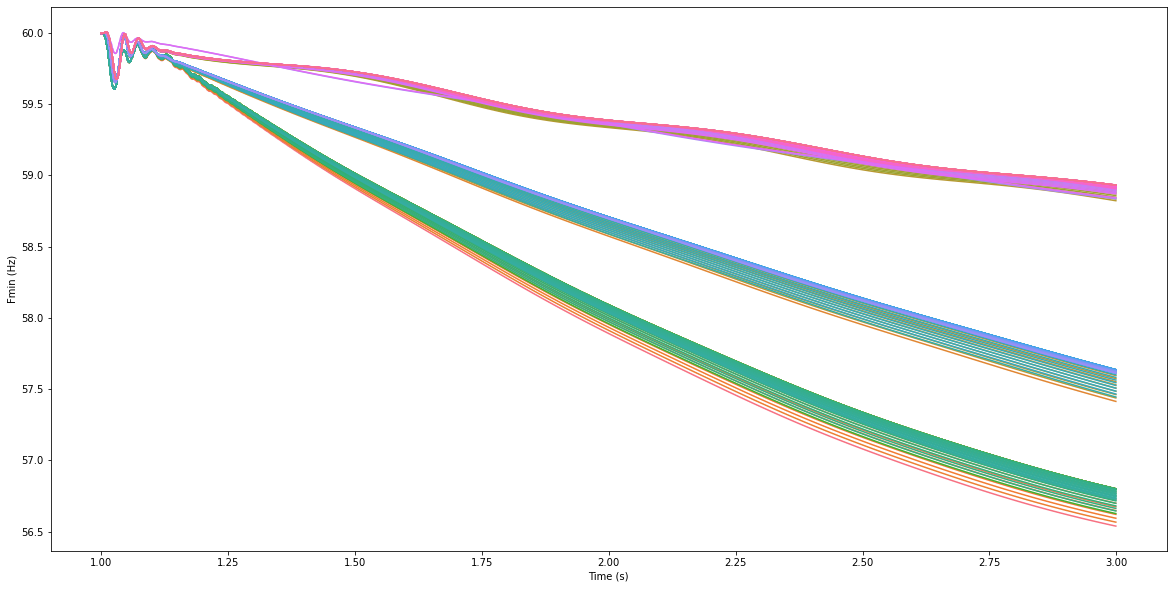

In [15]:
plt.figure(figsize=(20,10))
sns.lineplot(
    data=data.reset_index(),
    x="Time (s)", y='Fmin (Hz)', hue="code", legend=False
)